In [3]:
import pandas as pd

df2 = pd.read_csv('c:/data/lung_cancer_examples.csv')
df2.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
df2.columns


Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [5]:
print(len(df2.columns))

7


In [6]:
df2.columns[3:6]

Index(['Smokes', 'AreaQ', 'Alkhol'], dtype='object')

In [7]:
train_cols = df2.columns[3:6]
X = df2[train_cols]
y = df2['Result']

In [8]:
df2.shape

(59, 7)

In [9]:
df2['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: No, 1: Yes)')

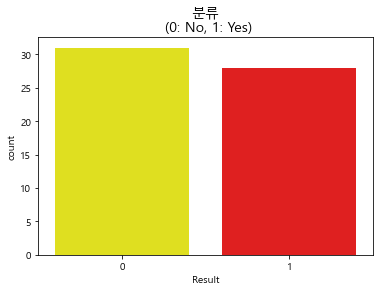

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0: No, 1: Yes)', fontsize=14)

In [11]:
#오버샘플링
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2_samp = pd.concat([X_samp, y_samp], axis=1)

In [ ]:
df2['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: No, 1: Yes)')

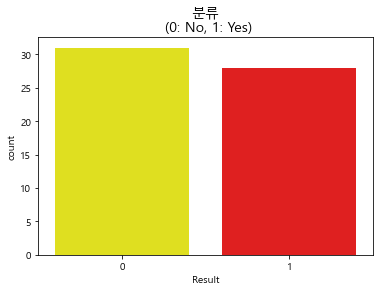

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0: No, 1: Yes)', fontsize=14)

In [19]:
X = df2_samp[train_cols]
y = df2_samp['Result']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [21]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10, max_iter=500)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=10)

In [22]:
print('학습용:', logit.score(X_train, y_train))
print('검증용:', logit.score(X_test, y_test))

학습용: 0.9795918367346939
검증용: 1.0
